In [ ]:
!pip install pyspammodel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.9 MB/s eta 0:00:00


In [ ]:
# (1) Importing the Aero-SPAM model into the current namespace
from pyspammodel import AeroSpam

# (2) Creating an instance of the Aero-SPAM model
aeroSpam = AeroSpam()

# (3) Calculating spectral bands
bands, lines = aeroSpam.get_spectra(f107=150.0)

In [ ]:
# (4) --
print(bands)

<xarray.Dataset> Size: 808B
Dimensions:           (band_center: 20, F107: 1, band_number: 20)
Coordinates:
  * F107              (F107) float64 8B 150.0
  * band_center       (band_center) float64 160B 7.5 12.5 17.5 ... 97.5 102.5
  * band_number       (band_number) int64 160B 0 1 2 3 4 5 ... 14 15 16 17 18 19
Data variables:
    euv_flux_spectra  (band_center, F107) float64 160B 3.265e+11 ... 2.72e+13
    lband             (band_number) float64 160B 5.0 10.0 15.0 ... 95.0 100.0
    uband             (band_number) float64 160B 10.0 15.0 20.0 ... 100.0 105.0
Attributes:
    F10.7 units:       10^-22 · W · m^-2 · Hz^-1
    spectra units:     W · m^-2 · nm^-1
    wavelength units:  nm
    euv_flux_spectra:  modeled EUV solar irradiance
    lband:             lower boundary of wavelength interval
    uband:             upper boundary of wavelength interval


In [ ]:
# (5) --
print(lines)

<xarray.Dataset> Size: 552B
Dimensions:           (line_wavelength: 17, F107: 1, line_number: 17)
Coordinates:
  * F107              (F107) float64 8B 150.0
  * line_wavelength   (line_wavelength) float64 136B 25.6 28.4 ... 103.2 121.6
  * line_number       (line_number) int64 136B 0 1 2 3 4 5 ... 11 12 13 14 15 16
Data variables:
    euv_flux_spectra  (line_wavelength, F107) float64 136B 8.982e+12 ... 5.37...
    wavelength        (line_number) float64 136B 25.6 28.4 30.3 ... 103.2 121.6
Attributes:
    F10.7 units:       10^-22 · W · m^-2 · Hz^-1
    spectra units:     W · m^-2 · nm^-1
    wavelength units:  nm
    euv_flux_spectra:  modeled EUV solar irradiance
    wavelength:        the wavelength of a discrete line


<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1204206969.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('Wavelength $\lambda$, $[nm]$')
/tmp/ipython-input-1204206969.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Photon flux $I$ , $[m^{-2} \cdot s^{-1} \cdot nm^{-1}]$')


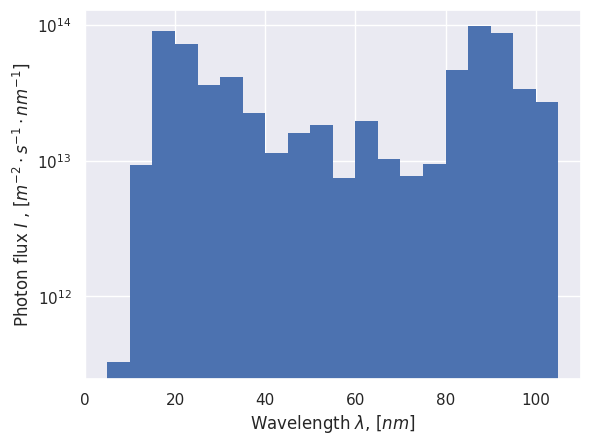

In [ ]:
# (6) Importing modules required to preprocess and plot EUV-bands
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# (7) Taking wavelength intervals and a flux as numpy arrays
lband = bands['lband'].to_numpy()
uband = bands['uband'].to_numpy()
euv_flux = bands['euv_flux_spectra'].to_numpy()

# (8) Converting the euv_flux array to 1D
#     for passing it to the plotting routine
euv_flux = euv_flux.flatten()

# (9) Making an array holding coordinates of all 'edges'
spectrum_edges = np.hstack([lband, uband[-1]])

# (10) --
plt.xlabel('Wavelength $\lambda$, $[nm]$')
plt.ylabel('Photon flux $I$ , $[m^{-2} \cdot s^{-1} \cdot nm^{-1}]$')
plt.yscale('log')
plt.stairs(values=euv_flux, edges=spectrum_edges, fill=True)

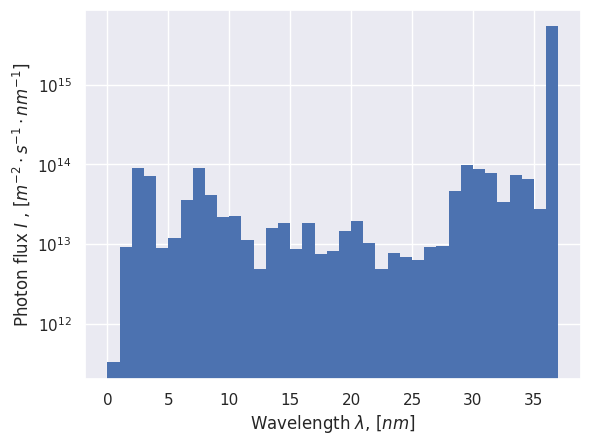

In [ ]:
# (1) Importing the Aero-SPAM model into the current namespace
from pyspammodel import AeroSpam

# (2) Creating an instance of the Aero-SPAM model
aeroSpam = AeroSpam()

# (3) Calculating spectral bands
spectra = aeroSpam.predict(f107=150.0)

# (4) Importing modules required to preprocess and plot EUV-bands
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# (5) Taking wavelength intervals and a flux as numpy arrays
lband = spectra['lband'].to_numpy()
uband = spectra['uband'].to_numpy()
euv_flux = spectra['euv_flux_spectra'].to_numpy()

# (6) Converting the euv_flux array to 1D
#     for passing it to the plotting routine
euv_flux = euv_flux.flatten()

# (7) Making an array holding coordinates of all 'edges'
spectrum_edges = np.hstack([lband, uband[-2]])

# (8) --
plt.xlabel('Wavelength $\\lambda$, $[nm]$')
plt.ylabel('Photon flux $I$ , $[m^{-2} \\cdot s^{-1} \\cdot nm^{-1}]$')
plt.yscale('log')
plt.stairs(values=euv_flux, fill=True)

In [ ]:
# (1) Importing the Solar-SPAM model into the current namespace
from pyspammodel import SolarSpam

# (2) Creating an instance of the Aero-SPAM model
solarSpam = SolarSpam()

# (3) Calculating spectral bands
bands = solarSpam.get_spectra(f107=150.0)

In [ ]:
# (4) --
print(bands)

<xarray.Dataset> Size: 8kB
Dimensions:           (band_center: 190, F107: 1, band_number: 190)
Coordinates:
  * F107              (F107) float64 8B 150.0
  * band_center       (band_center) float64 2kB 0.5 1.5 2.5 ... 188.5 189.5
  * band_number       (band_number) int64 2kB 0 1 2 3 4 ... 185 186 187 188 189
Data variables:
    euv_flux_spectra  (band_center, F107) float64 2kB 1.319e-05 ... 0.002525
    lband             (band_number) int64 2kB 0 1 2 3 4 ... 185 186 187 188 189
    uband             (band_number) int64 2kB 1 2 3 4 5 ... 186 187 188 189 190
Attributes:
    F10.7 units:       10^-22 · W · m^-2 · Hz^-1
    spectra units:     W · m^-2 · nm^-1
    wavelength units:  nm
    euv_flux_spectra:  modeled EUV solar irradiance
    lband:             lower boundary of wavelength interval
    uband:             upper boundary of wavelength interval
